### Import all Libraries

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
import sklearn.tree as tree

### Import Dataset

In [2]:
df = pd.read_csv('Data/drug200.csv')

In [3]:
df.head()

,Age,Sex,BP,Cholesterol,Na_to_K,Drug
0,23,F,HIGH,HIGH,25.355,drugY
1,47,M,LOW,HIGH,13.093,drugC
2,47,M,LOW,HIGH,10.114,drugC
3,28,F,NORMAL,HIGH,7.798,drugX
4,61,F,LOW,HIGH,18.043,drugY


### Descriptive Analysis

In [4]:
df.describe()

,Age,Na_to_K
count,200.000000,200.000000
mean,44.315000,16.084485
std,16.544315,7.223956
min,15.000000,6.269000
25%,31.000000,10.445500
50%,45.000000,13.936500
75%,58.000000,19.380000
max,74.000000,38.247000


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Age          200 non-null    int64  
 1   Sex          200 non-null    object 
 2   BP           200 non-null    object 
 3   Cholesterol  200 non-null    object 
 4   Na_to_K      200 non-null    float64
 5   Drug         200 non-null    object 
dtypes: float64(1), int64(1), object(4)
memory usage: 9.5+ KB


In [6]:
#They didn't contain any null value
df.isnull().sum(axis=0)

Age            0
Sex            0
BP             0
Cholesterol    0
Na_to_K        0
Drug           0
dtype: int64

In [7]:
df['BP'].value_counts()

HIGH      77
LOW       64
NORMAL    59
Name: BP, dtype: int64

In [8]:
df['Cholesterol'].value_counts()

HIGH      103
NORMAL     97
Name: Cholesterol, dtype: int64

In [9]:
df['Sex'].value_counts()

M    104
F     96
Name: Sex, dtype: int64

### Data Encoding

In [10]:
le_bp = LabelEncoder()
le_cholesterol = LabelEncoder()
le_sex = LabelEncoder()

In [11]:
le_bp.fit(['HIGH', 'LOW', 'NORMAL'])
le_cholesterol.fit(['HIGH', 'NORMAL'])
le_sex.fit(['M', 'F'])

LabelEncoder()

In [12]:
df['Sex'] = le_sex.transform(df['Sex'])
df['BP'] = le_bp.transform(df['BP'])
df['Cholesterol'] = le_cholesterol.transform(df['Cholesterol'])

In [13]:
df.head()

,Age,Sex,BP,Cholesterol,Na_to_K,Drug
0,23,0,0,0,25.355,drugY
1,47,1,1,0,13.093,drugC
2,47,1,1,0,10.114,drugC
3,28,0,2,0,7.798,drugX
4,61,0,1,0,18.043,drugY


### Model Training & Evaluation

In [14]:
X = df[['Age', 'Sex', 'BP', 'Cholesterol', 'Na_to_K']]
Y = df['Drug']

In [15]:
train_x, test_x, train_y, test_y = train_test_split(X, Y, test_size=0.2, random_state=0)

In [16]:
dc = DecisionTreeClassifier(criterion='entropy', max_depth=4)

In [17]:
dc.fit(train_x, train_y)

DecisionTreeClassifier(criterion='entropy', max_depth=4)

In [18]:
train_predict = dc.predict(train_x)
test_predict = dc.predict(test_x)

In [19]:
print("Accuracy (Train): ", accuracy_score(train_y, train_predict))
print("Accuracy (Test): ", accuracy_score(test_y, test_predict))

Accuracy (Train):  1.0
Accuracy (Test):  1.0


In [20]:
train_y[0:5]

134    drugY
66     drugA
26     drugY
113    drugX
168    drugY
Name: Drug, dtype: object

In [21]:
train_predict[0:5]

array(['drugY', 'drugA', 'drugY', 'drugX', 'drugY'], dtype=object)

In [22]:
test_y[0:5]

18     drugC
170    drugX
107    drugY
98     drugY
177    drugY
Name: Drug, dtype: object

In [23]:
test_predict[0:5]

array(['drugC', 'drugX', 'drugY', 'drugY', 'drugY'], dtype=object)

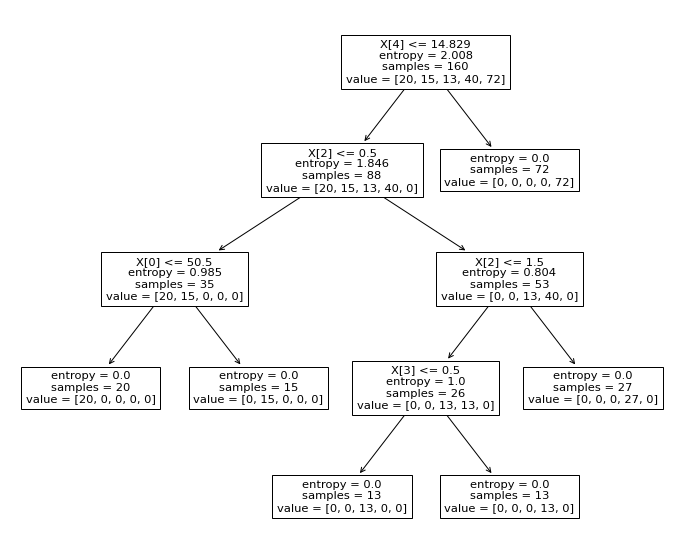

In [24]:
plt.figure(figsize=(12,10))
tree.plot_tree(dc)
plt.show()